In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler

In [2]:
df_train = pd.read_csv('./processed_data/df_train.csv')
X_train = df_train.drop('label', axis=1)
y_train = df_train['label']

In [3]:
# fit scaler on training data
norm = MinMaxScaler().fit(X_train)
# transform training data
X_train_norm = norm.transform(X_train)
X_train_norm

array([[0.        , 0.00117997, 0.00014771, ..., 0.        , 0.        ,
        0.        ],
       [0.00529916, 0.00166069, 0.011226  , ..., 0.        , 0.        ,
        0.        ],
       [0.00665475, 0.00858754, 0.0127031 , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.01478834, 0.00048073, 0.00324963, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.00321213, 0.00014771, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.00168255, 0.00014771, ..., 0.        , 0.        ,
        0.        ]])

In [4]:
df_test = pd.read_csv('./processed_data/df_test.csv')
X_test = df_test.drop('label', axis=1)
y_test = df_test['label']

In [5]:
# transform testing data
X_test_norm = norm.transform(X_test)
X_test_norm

array([[6.16180911e-04, 3.27768552e-04, 5.02215657e-03, ...,
        0.00000000e+00, 1.34529148e-02, 0.00000000e+00],
       [6.16180911e-04, 5.06948693e-03, 2.80649926e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 4.37024736e-05, 1.47710487e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [1.23236182e-03, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 1.47710487e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [6]:
model = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)
model.fit(X_train_norm, y_train)

RandomForestClassifier(max_leaf_nodes=16, n_estimators=500, n_jobs=-1)

In [7]:
model.score(X_test_norm, y_test)

0.9748571428571429

In [8]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test_norm)
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[507  13   0   2   0   1   0]
 [ 28 490   0   0   0   1   3]
 [  0   0 504   0   3   7   1]
 [  0   0   0 469   3   0   0]
 [  1   0   6   1 470   0   0]
 [  0   0   5   0   2 512   1]
 [  0   0   5   0   1   4 460]]


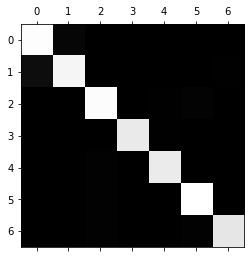

In [9]:
import matplotlib.pyplot as plt
plt.matshow(confusion_matrix, cmap=plt.cm.gray)
plt.show()

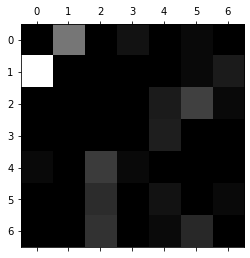

In [10]:
row_sums = confusion_matrix.sum(axis=1, keepdims=True)
norm_conf_mx = confusion_matrix / row_sums
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)

# rows represent actual classes
# columns represent predicted classes
plt.show()